# 	Preliminary data inspection and findings on the structure of the data, missing values, duplicates, etc

In [1]:
# Importing required libraries to do operations on the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating a dataframe by importing an excel file
df=pd.read_excel(r"E:\\DATA SCIENCE\\ML\\Machine Learning _ Rocky _ Resources\\Project\\1645792390_cep1_dataset.xlsx")
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### Data Description
    Variable    Description
    Age:	  : Age in years.
    Sex:	  : 1 = male; 0 = female.
    cp:	      : Chest pain type(0:typical angina, 1:atypical angina, 2:non-anginal pain,3:asymptomatic).                   
    trestbps: : Resting blood pressure (in mm Hg on admission to the hospital).
    chol:	  : Serum cholesterol in mg/dl.
    fbs:	  : Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
    restecg:  : Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing definite                   left ventricular hypertrophy(T wave inversions and/or ST elevation or depression of > 0.05 mV)).
    thalach: :	Maximum heart rate achieved.
    Exang:   :  chest pain caused by exercise (1 = yes; 0 = no).
    oldpeak: :	ST depression induced by exercise relative to rest.
    slope:	 :  Slope of the peak exercise ST segment(0: downsloping; 1: flat; 2: upsloping).
    ca	     :  Number of major vessels (0-3) colored by fluoroscopy.
    thal     :  A blood disorder called thalassemia( 0: NULL ;1: fixed defect(no blood flow in some part of the                             heart),2:normal blood flow,3: reversible defect).
    Target:  :	Admitted patients status(1= diseased 0= normal).

# Exploratory data analysis

In [3]:
#Changing the column names of the given dataset
df.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg_type',
       'max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope_type','num_major_vessels','thalassemia_type','target']

In [4]:
df.info() #viewing the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg_type            303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope_type            303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia_type         303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
df.shape #checking shape after dropping duplicates from the dataframe

(303, 14)

In [6]:
df.drop_duplicates(inplace=True) #deleting duplicate rows if exists any
df.shape

(302, 14)

In [7]:
# Re-arranging the df index values
df.reset_index(drop=True,inplace=True)
# checking for null values across all rows if any present
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg_type              0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope_type              0
num_major_vessels          0
thalassemia_type           0
target                     0
dtype: int64

In [8]:
# creating a dataframe which contains only categorical features
ctgl_df=df.drop(columns=['age','resting_blood_pressure','cholesterol','st_depression','max_heart_rate_achieved'],axis=1)
ctgl_df.head(2)

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg_type,exercise_induced_angina,st_slope_type,num_major_vessels,thalassemia_type,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1


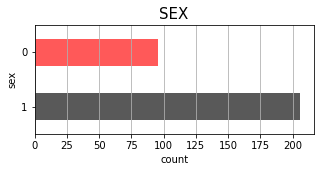

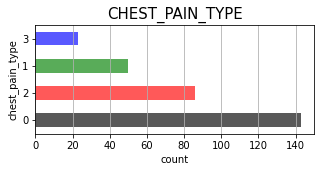

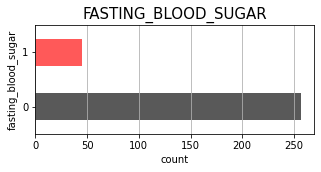

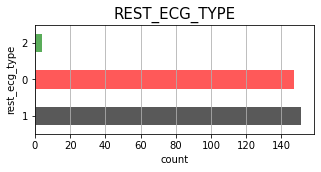

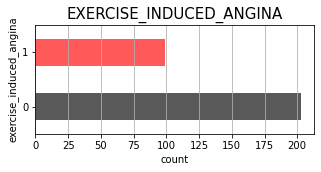

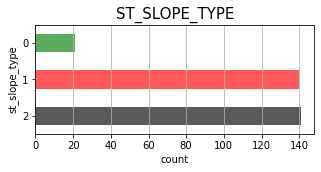

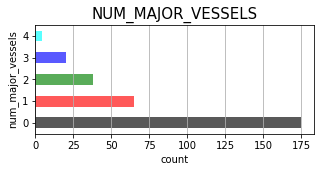

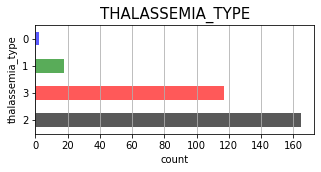

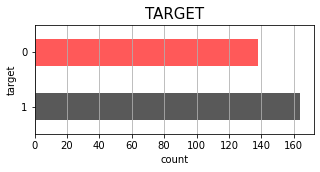

In [9]:
# Visualising the data of categorical features in the Cardiovascular disease  dataset through a series of plots of 
#categorical data
for i, column in enumerate(ctgl_df):
    plt.figure(figsize=(5,2)) 
    ctgl_df[column].value_counts().plot(kind='barh',color=['black', 'red', 'green', 'blue', 'cyan'],alpha=.65)
    plt.title(column.upper(),{'size':15}) 
    plt.grid(axis='x')
    plt.xlabel('count')
    plt.ylabel(column)

#### From the above plots,the observations made from the categorical data in the given dataset is that number of major vessels colored by fluoroscopy that ranged between 0 and 3.Therefore we have to drop the value 4 from the df['num_major_vessels']             
      

In [10]:
ctgl_df.shape #Viewing the shape of categorical data

(302, 9)

In [11]:
# dropping out the values of 'num_major_vessels=4' from the dataframe 'df'
df=df[df['num_major_vessels']!=4]
# replacing the null value using mode function on thalassemia_type.
df.loc[df.thalassemia_type==0,'thalassemia_type']=2 

In [12]:
df.thalassemia_type.value_counts() #Viewing the values of thalassemia type to see the index values are replaced or not 

2    165
3    115
1     18
Name: thalassemia_type, dtype: int64

In [13]:
df.shape #veiwing the shape of the dataframe of entire dataset

(298, 14)

In [14]:
df.describe() #Viewing the statistical data for every row of the generated data frame

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.510067,0.677852,0.959732,131.580537,246.906040,0.147651,0.523490,149.466443,0.328859,1.055369,1.395973,0.674497,2.325503,0.540268
std,9.030526,0.468085,1.033963,17.669293,51.893097,0.355350,0.526521,22.983830,0.470589,1.164162,0.617574,0.938202,0.584382,0.499214
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [15]:
new_df=df.copy() #Making a copy of the dataframe df.

## Outliers Inspection

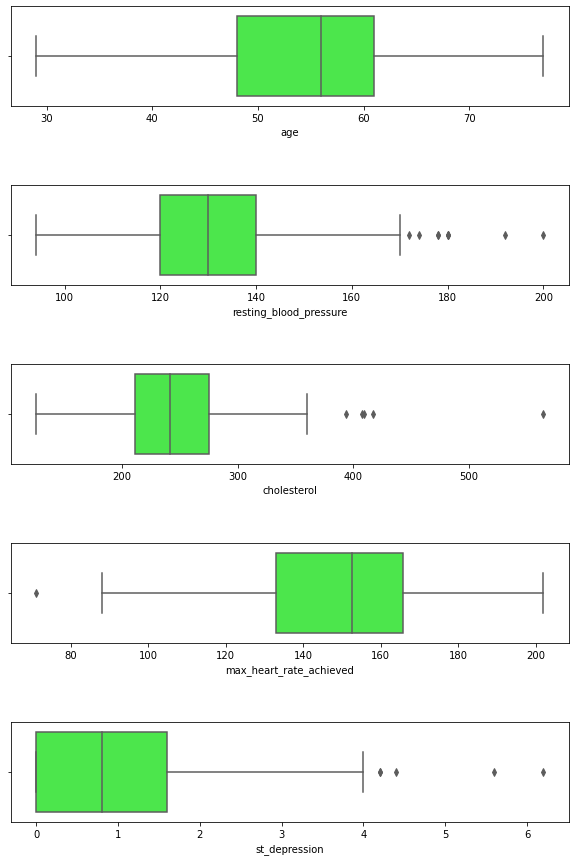

In [16]:
# Plotting boxplots to verify the outliers in the dataset or not
fig, axs = plt.subplots(5,figsize=(10,15))
plt.subplots_adjust(hspace = 0.8)
df1 = df[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']]
for i,column in enumerate(df1):
    sns.boxplot(df1[column], ax=axs[i],color='#33ff33')
    axs[i].set_xlabel(column)

In [17]:
# Creating a function to detect outliers
anomalies = []
def find_outliers(column):
    Q1,Q3=np.percentile(column,[25,75])
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(IQR*1.5)
# Generate outliers
    for outlier in column:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies 

In [18]:
#Creating a new dataframe by dropping outliers
for column in df1:
    anoms=find_outliers(new_df[column])
    new_df=new_df[new_df[column].isin(anoms) == False]
    print(new_df.shape)
    print('-------------')
    print(len(anoms))
new_df.shape # checking the final shape of the dataframe after removing the outliers

(298, 14)
-------------
0
(289, 14)
-------------
9
(277, 14)
-------------
14
(257, 14)
-------------
15
(255, 14)
-------------
17


(255, 14)

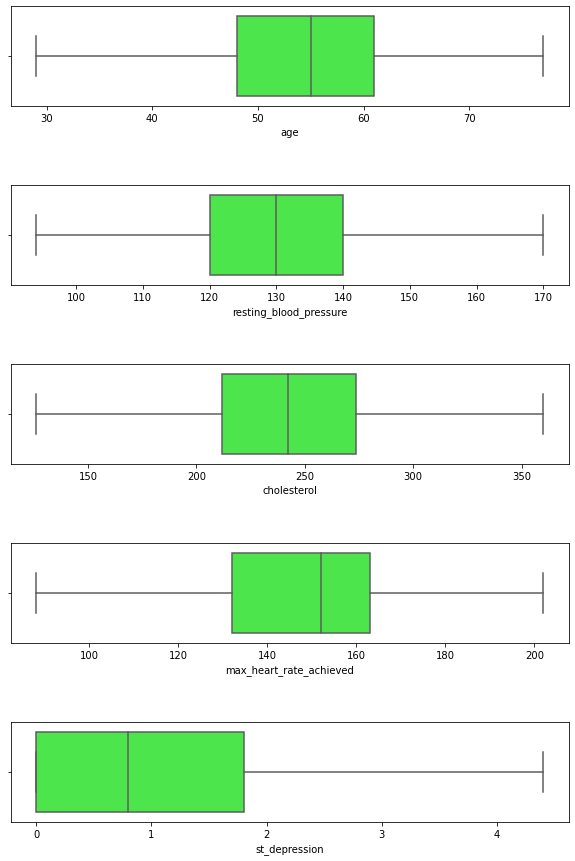

In [19]:
#Ploting the boxplots to check whether the data has outliers or not
fig, axs = plt.subplots(5,figsize=(10,15))
plt.subplots_adjust(hspace = 0.8)
for i,column in enumerate(df1):
    sns.boxplot(new_df[column], ax=axs[i],color='#33ff33')
    axs[i].set_xlabel(column)

In [20]:
new_df.shape #checking for the rows that had dropped in previous step

(255, 14)

In [21]:
new_df.isnull().sum() #Checking whether the data has null values or not

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg_type              0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope_type              0
num_major_vessels          0
thalassemia_type           0
target                     0
dtype: int64

In [22]:
new_ndf=new_df.copy() # making the copy of the dataframe with numerical data for categorical columns

In [23]:
# Replacing the data of numerical categorical data into alphabetical categorical data 
new_df['sex'].replace({1:'Male',0:'Female'},inplace=True)

new_df['chest_pain_type'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'},inplace=True)

new_df['fasting_blood_sugar'].replace({0:'< 120mg/ml',1:'> 120mg/ml'},inplace=True)

new_df['rest_ecg_type'].replace({0:'normal',1:'abnormal',2:'hyper'},inplace=True)

new_df['exercise_induced_angina'].replace({0:'no',1:'yes'},inplace=True)

new_df['st_slope_type'].replace({2:'downsloping',1:'flat',0:'upsloping'},inplace=True)

new_df['thalassemia_type'].replace({1:'fixed defect',2:'normal blood flow',3:'reversible defect'},inplace=True)

new_df['target'].replace({1:'diseased',0:'healthy'},inplace=True)
                       

In [24]:
new_df.info() #Viewing the overall information of the manipulated dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 300
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      255 non-null    int64  
 1   sex                      255 non-null    object 
 2   chest_pain_type          255 non-null    object 
 3   resting_blood_pressure   255 non-null    int64  
 4   cholesterol              255 non-null    int64  
 5   fasting_blood_sugar      255 non-null    object 
 6   rest_ecg_type            255 non-null    object 
 7   max_heart_rate_achieved  255 non-null    int64  
 8   exercise_induced_angina  255 non-null    object 
 9   st_depression            255 non-null    float64
 10  st_slope_type            255 non-null    object 
 11  num_major_vessels        255 non-null    int64  
 12  thalassemia_type         255 non-null    object 
 13  target                   255 non-null    object 
dtypes: float64(1), int64(5), o

In [25]:
#Creating a function to plot pie charts and countplots of categorical columns
ctg_df=new_df.drop(columns=['age','resting_blood_pressure','cholesterol','st_depression','max_heart_rate_achieved'],axis=1)
def ctg_plots(col):
    fig,axes=plt.subplots(1,2,figsize=(15,5))
    plt.tight_layout(pad = 10)
    cnts=ctg_df[col].value_counts()
    cnts.plot.pie(ax=axes[0],radius = 1,cmap = 'GnBu',shadow = True,autopct = '%1.1f%%',explode=[0.01]*new_df[col].nunique(),
                  textprops = {'color':'black','size': 10})
    axes[0].set_title('Overall {} distribution of patients'.format(col),{'size':15})
    
    sns.countplot(data=new_df,x=col,hue='target',palette='cubehelix',ax=axes[1])
    plt.xlabel(col,{'size':15})            

Text(0.5, 0, 'Age')

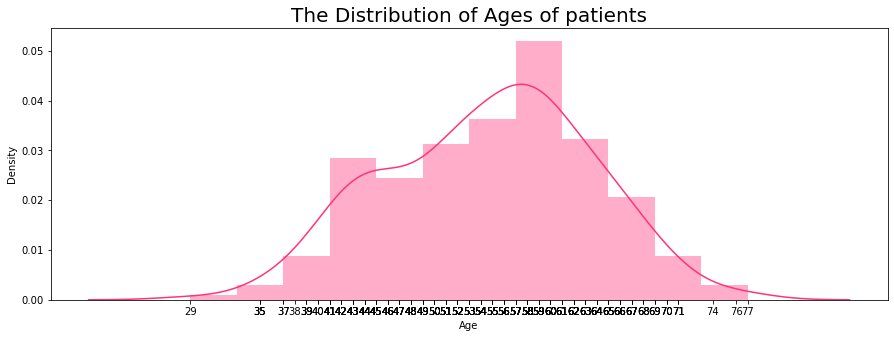

In [26]:
#Ploting the entire data to ages to check for the distribution of pateints w.r.t ages
plt.figure(figsize=(15,5))
sns.distplot(new_df['age'],color='#ff3377')
plt.title('The Distribution of Ages of patients',{'size':20})
plt.xticks(new_df['age'])
plt.xlabel('Age')

Text(0.5, 1.0, 'The Distribution of Resting blood pressure (in mm Hg)')

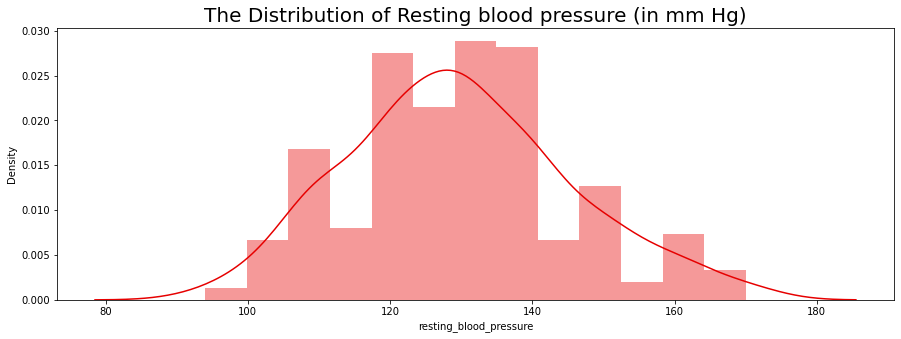

In [27]:
#plotting the distribution of resting blood pressure of patients admitted in the hospital
plt.figure(figsize=(15,5))
sns.distplot(new_df['resting_blood_pressure'],color='#e60000')
plt.title('The Distribution of Resting blood pressure (in mm Hg)',{'size':20})

    ##    Patients of age between 57 to 59 are frequently coming for health check up

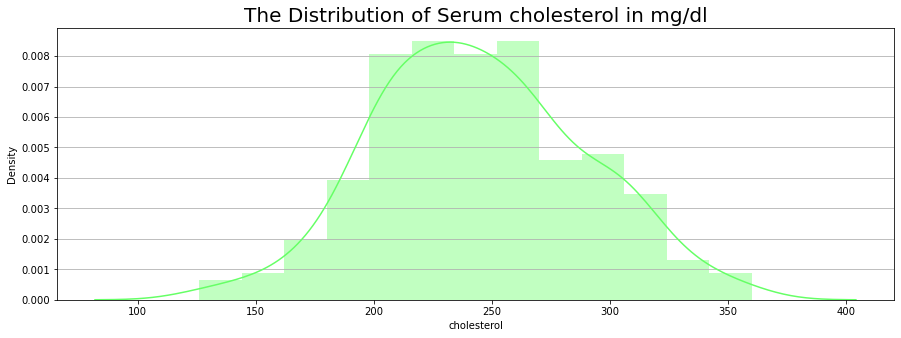

In [28]:
# #plotting the distribution of Serum cholesterol of patients admitted in the hospital
plt.figure(figsize=(15,5))
sns.distplot(new_df['cholesterol'],color='#66ff66')
plt.title('The Distribution of Serum cholesterol in mg/dl',{'size':20})
plt.grid(axis='y')

Text(0.5, 1.0, 'The Distribution of max_heart_rate_achieved')

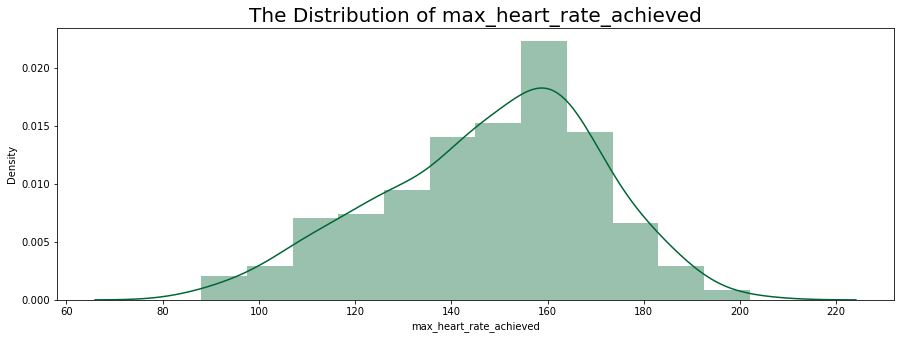

In [29]:
# # #plotting the distribution of max_heart_rate_achieved of patients admitted in the hospital
plt.figure(figsize=(15,5))
sns.distplot(new_df['max_heart_rate_achieved'],color='#006633')
plt.title('The Distribution of max_heart_rate_achieved',{'size':20})

In [30]:
new_df.describe() #Viewing the statistical extracts of the dataset with continous data

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,54.588235,129.682353,244.733333,148.050980,1.034902,0.713725
std,8.830817,15.654648,44.425372,22.290877,1.082792,0.947649
min,29.000000,94.000000,126.000000,88.000000,0.000000,0.000000
25%,48.000000,120.000000,212.000000,132.000000,0.000000,0.000000
50%,55.000000,130.000000,242.000000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,273.500000,163.000000,1.800000,1.000000
max,77.000000,170.000000,360.000000,202.000000,4.400000,3.000000


In [31]:
new_df.head()# Checking the data with in the dataframe

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,Male,asymptomatic,145,233,> 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,diseased
1,37,Male,non-anginal pain,130,250,< 120mg/ml,abnormal,187,no,3.5,upsloping,0,normal blood flow,diseased
4,57,Female,typical angina,120,354,< 120mg/ml,abnormal,163,yes,0.6,downsloping,0,normal blood flow,diseased
6,56,Female,atypical angina,140,294,< 120mg/ml,normal,153,no,1.3,flat,0,normal blood flow,diseased
7,44,Male,atypical angina,120,263,< 120mg/ml,abnormal,173,no,0.0,downsloping,0,reversible defect,diseased


# c.	Study the occurrence of CVD across the Age category

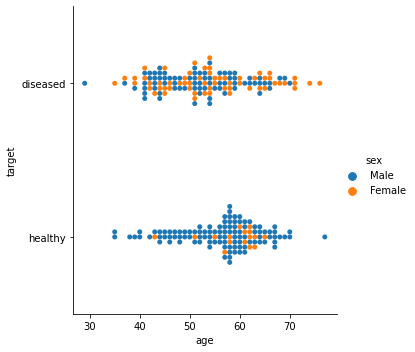

In [32]:
#plot to relate the age w.r.t target variable
sns.catplot(data=new_df,x='age',y='target',hue='sex',kind='swarm')

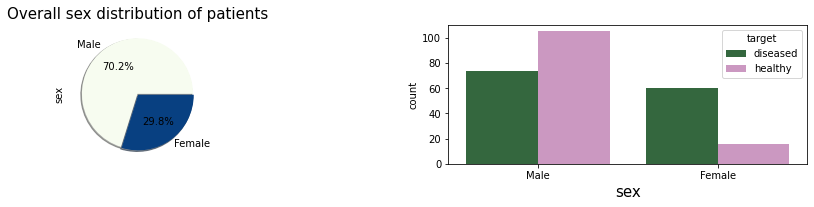

In [33]:
ctg_plots('sex') #calling the plot function to plot the distribution of data w.r.t sex

In [34]:
#Creating a dataframe of diseased patients
patients_with_cvd=new_df[new_df['target']=='diseased']
patients_with_cvd.shape

(134, 14)

Text(0.5, 1.0, 'The Distribution of chest pain type of patients with CVD w.r.t AGES')

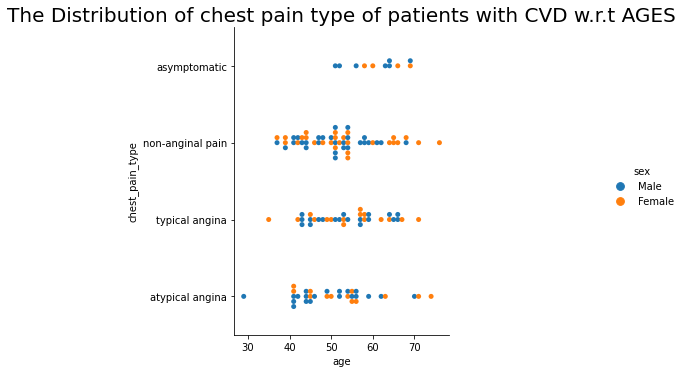

In [35]:
# Creating a plot to view the distribution of chest pain types w.r.t target variables
sns.catplot(data=patients_with_cvd,x='age',y='chest_pain_type',hue='sex',kind='swarm',height=5)
plt.title('The Distribution of chest pain type of patients with CVD w.r.t AGES',{'size':20})

     ##From the above plot ,we can conclude that:
         ~ Most of the patients with non_anginal pain were get diseased with cvd which belongs to the age group of 40 to 55             years.
         ~ Patients with asymptomatic_type chest pain occurs rarely to people of ages between 51 and 70 years.
         

Text(0.5, 1.0, 'The Distribution of patients with resting blood pressure with CVD w.r.t AGES')

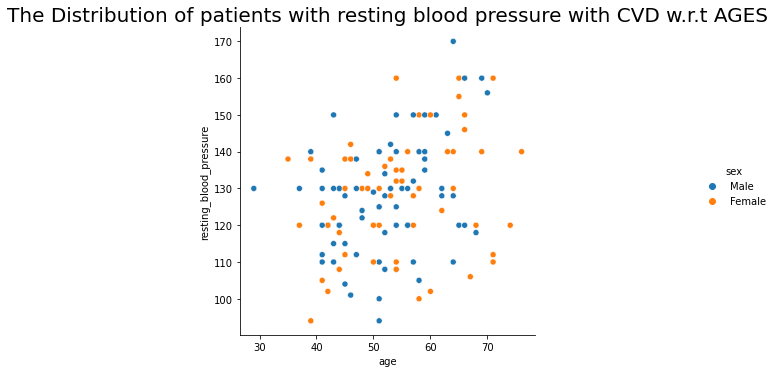

In [36]:
#ploting the data of resting blood pressure w.r.t ages of patients with CVD
sns.relplot(data=patients_with_cvd,x='age',y='resting_blood_pressure',hue='sex')
plt.title('The Distribution of patients with resting blood pressure with CVD w.r.t AGES',{'size':20})

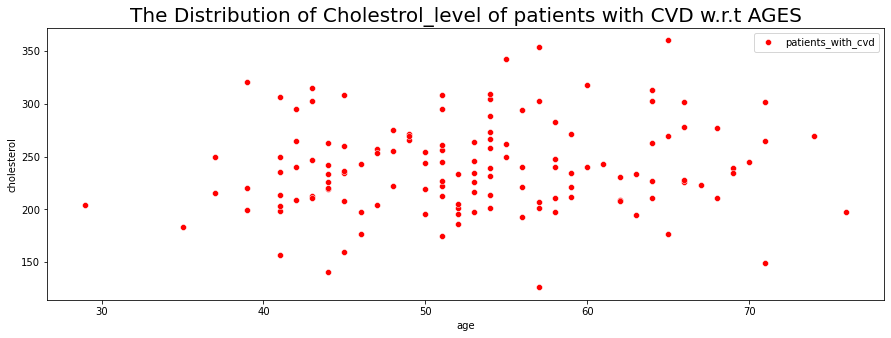

In [37]:
# #ploting the data of Cholestrol_level w.r.t ages of patients with CVD
plt.figure(figsize=(15,5))
sns.scatterplot(patients_with_cvd['age'],patients_with_cvd['cholesterol'],color='#ff0000',label='patients_with_cvd')
plt.title('The Distribution of Cholestrol_level of patients with CVD w.r.t AGES',{'size':20})
plt.legend()

    ##    Cholestrol level is high in patients with CVD when compared with other patients and most of the patients with CVD are belongs to the age cateogory of 50 to 60 years

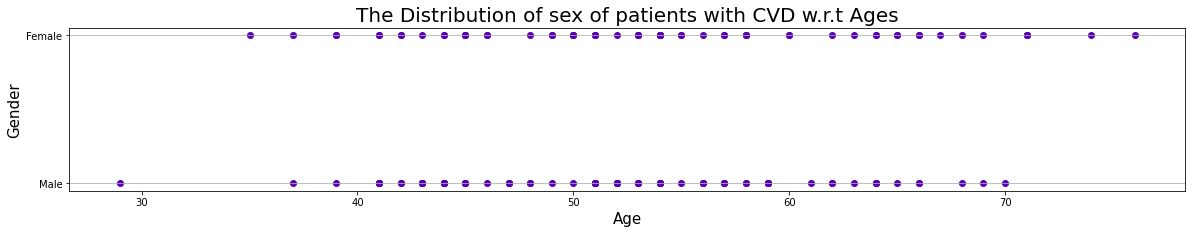

In [38]:
# ploting the data of sex w.r.t ages of patients with CVD
plt.figure(figsize=(20,3))
plt.scatter(patients_with_cvd['age'],patients_with_cvd['sex'],color='#5900b3')
plt.title('The Distribution of sex of patients with CVD w.r.t Ages',{'size':20})
#plt.xticks(patients_with_cvd['age'])
plt.xlabel('Age',{'size':15})
plt.ylabel('Gender',{'size':15})
plt.grid(axis='y')

     ##    From the above plot,we conclude that most of male patients of age 40 to 60 years of are facing more cardiac disease than female patients

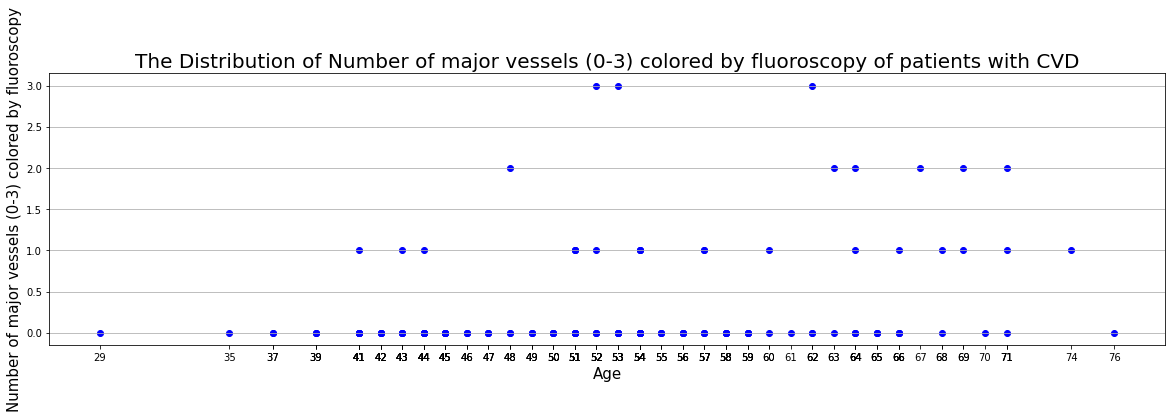

In [39]:
## ploting the data of Number of major vessels (0-3) colored by fluoroscopy w.r.t ages of patients with CVD
plt.figure(figsize=(20,5))
plt.scatter(patients_with_cvd['age'],patients_with_cvd['num_major_vessels'],color='blue')
plt.title('The Distribution of Number of major vessels (0-3) colored by fluoroscopy of patients with CVD',{'size':20})
plt.xticks(patients_with_cvd['age'])
plt.xlabel('Age',{'size':15})
plt.ylabel('Number of major vessels (0-3) colored by fluoroscopy',{'size':15})
plt.grid(axis='y')

     ## From the plot we can conclude that most patients with cvd found to have no major blood vessels coloured by fluo-roscopy.

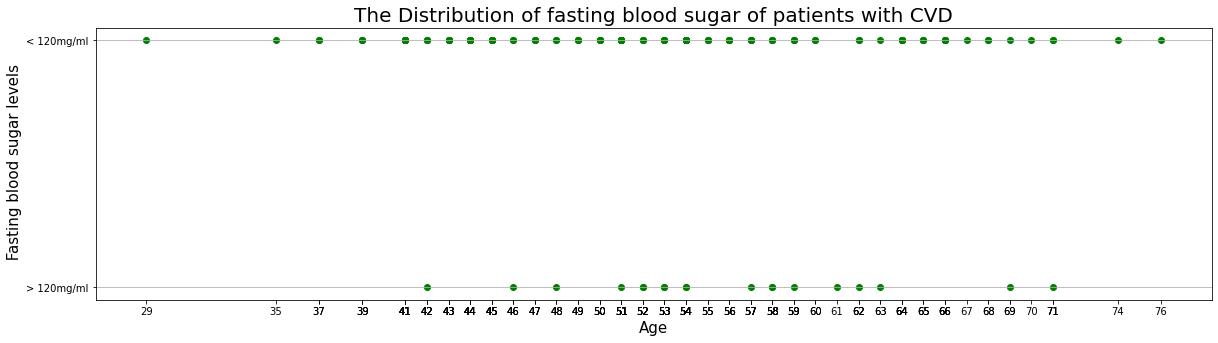

In [40]:
# ploting the data of fasting blood sugar w.r.t ages of patients with CVD
plt.figure(figsize=(20,5))
plt.scatter(patients_with_cvd['age'],patients_with_cvd['fasting_blood_sugar'],color='green')
plt.title('The Distribution of fasting blood sugar of patients with CVD',{'size':20})
plt.xticks(patients_with_cvd['age'])
plt.xlabel('Age',{'size':15})
plt.ylabel(' Fasting blood sugar levels',{'size':15})
plt.grid(axis='y')

    ## From the plot we can conclude that most patients with cvd found to have low fasting blood sugar

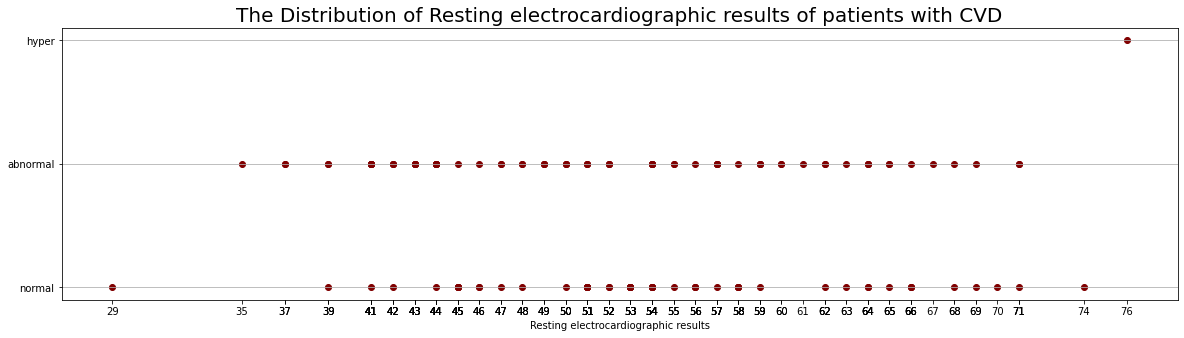

In [41]:
#Viewing the distribution of resting ecg results of patients with CVD w.r.t ages
plt.figure(figsize=(20,5))
plt.scatter(patients_with_cvd['age'],patients_with_cvd['rest_ecg_type'],color=['#800000'])
plt.title('The Distribution of Resting electrocardiographic results of patients with CVD',{'size':20})
plt.xticks(patients_with_cvd['age'])
plt.xlabel('Resting electrocardiographic results')
plt.grid(axis='y') 

    ## From the plot we can conclude that patients with cvd has very rare chances of facing left ventricular hypertrophy and it occurs to the very old patients of age above 70 years

Text(0.5, 1.0, 'The Distribution of Maximum heart rate achieved by patients on admission to the hospital w.r.t AGES')

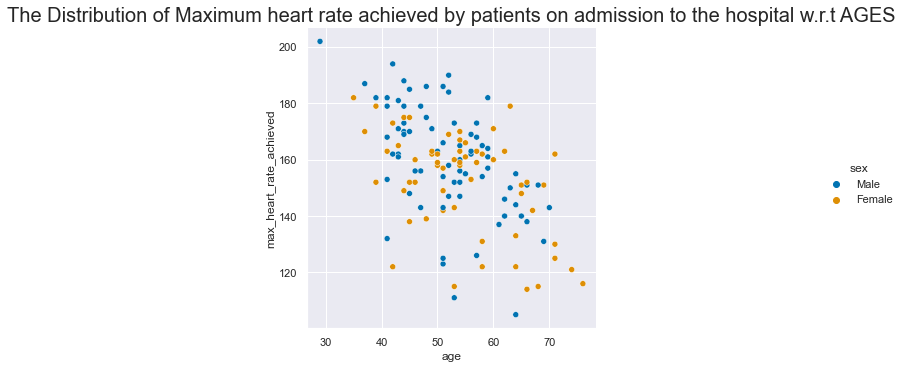

In [42]:
#To view the maximum heart rate achieved by pateints with CVD w.r.t age  
sns.set_theme(style="darkgrid")
sns.relplot(data=patients_with_cvd,x='age',y='max_heart_rate_achieved',hue='sex',palette="colorblind")
plt.title('The Distribution of Maximum heart rate achieved by patients on admission to the hospital w.r.t AGES',{'size':20})

    ## from the above plot we can conclude that 
    ~ patients of age between 50 to 60,most patients have heart rate between 140 to 180.
    ~ Only male patients observe to be has more heart beat rate which is above 180 of the ages 40 to 60 years.

Text(0.5, 1.0, 'The Distribution of blood disorderness of patients with CVD w.r.t AGES')

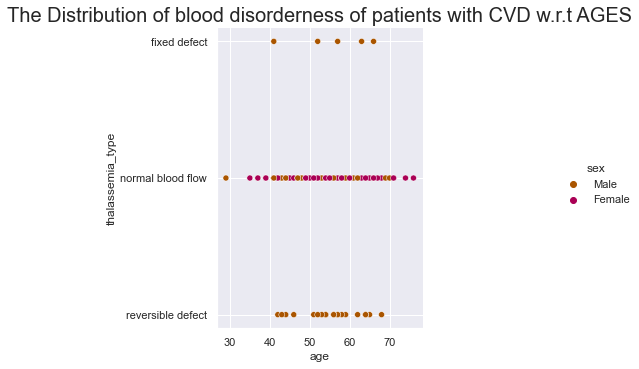

In [43]:
# To view the blood disorderness of pateints with CVD w.r.t ages
sns.relplot(data=patients_with_cvd,y='thalassemia_type',x='age',hue='sex',palette='brg_r',height=5)
plt.title('The Distribution of blood disorderness of patients with CVD w.r.t AGES',{'size':20})

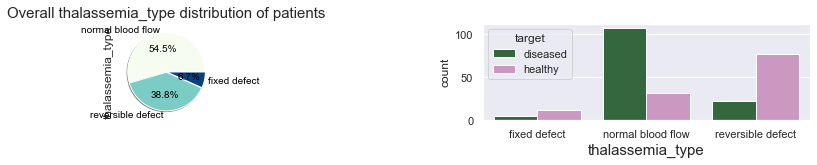

In [44]:
ctg_plots('thalassemia_type') 

    ## From the above plot,we can observe that
        ~ Normal blood flow is commom to the patients with CVD.
        ~ reversible defect and fixed defect are most common types of blood disorders to the male patients with CVD of ages between 40 to 60 years

# d.Composition of all patients with respect to the Sex category

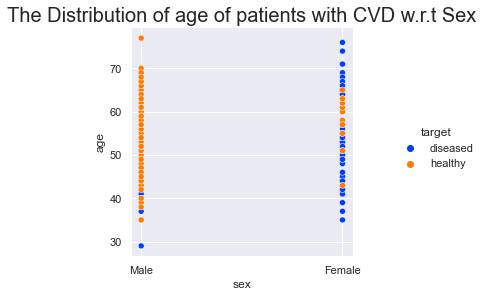

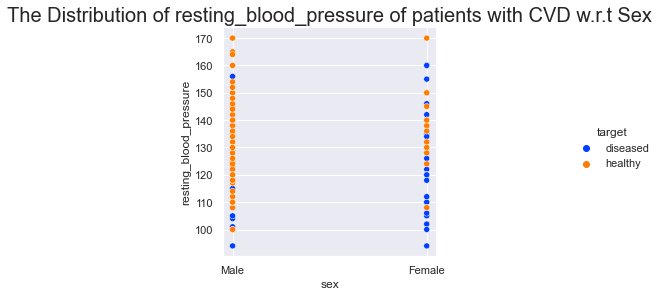

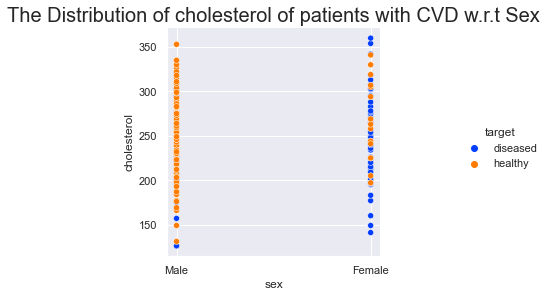

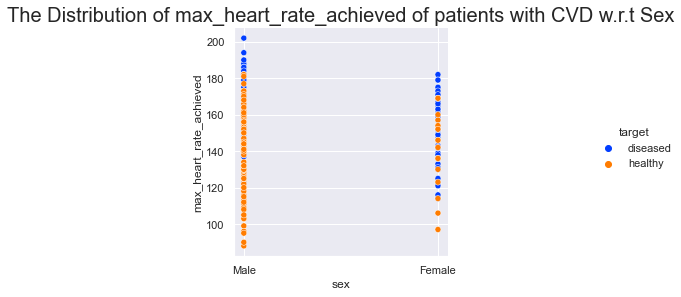

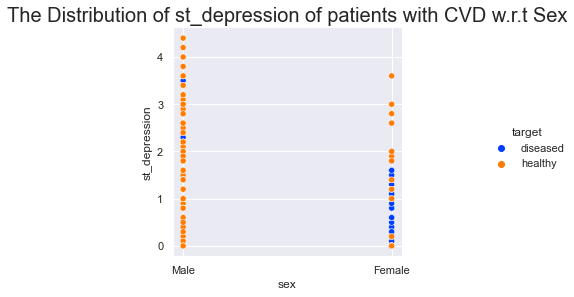

In [45]:
# Creating a for loop to plot the distribution of non categorical data w.r.t SEX
for column in df1:
    sns.relplot(data=new_df,y=column,x='sex',hue='target',palette='bright',height=4)
    plt.title('The Distribution of {} of patients with CVD w.r.t Sex'.format(column),{'size':20})     

## Insights gained from the above plots:
    ~ Female patients of higher ages had CVD.
    ~ Male patients of higher ages were rarely have CVD.
    ~ Patients who are not diseased were recorded with highest resting blood pressure.
    ~ The diseased Female patients were recorded with highest resting blood pressure of 160 mmHg.
    ~ The diseased Female patients were recorded with highest cholestorol which is above 350.
    ~ Maximum heart rate were recorded for male dieased patients is of above 200bpm.
    ~ Male patients are recorded with maximum st_depression

# e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [46]:
# Creating a dataframe with the outliers present in resting blood pressure of patients
anomaly_df=df[df['resting_blood_pressure']>170]
anomaly_df.shape

(9, 14)

Text(0, 0.5, 'Resting_blood_pressure')

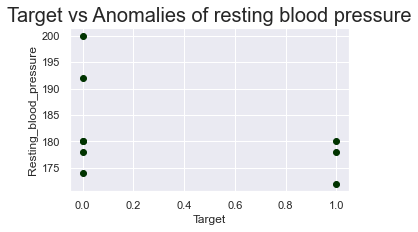

In [47]:
#To view the distribution ANomalies w.r.t target variables
plt.figure(figsize=(5,3))
plt.scatter(anomaly_df['target'],anomaly_df['resting_blood_pressure'],color="#003300")
plt.title('Target vs Anomalies of resting blood pressure',{'size':20})
plt.xlabel('Target')
plt.ylabel('Resting_blood_pressure')

    # From the above plot we can conclude that it is not possible to detect the heart attacks based on the anamalies of resting blood pressure as we can see that from our data support for non-diseased patients is more than the diseased patients

# f.	Describe the relationship between cholesterol levels and a target variable

<Figure size 1080x360 with 0 Axes>

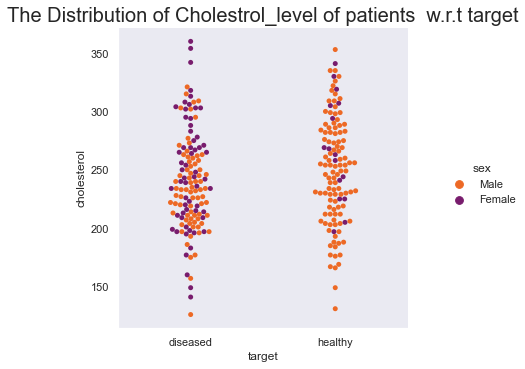

In [48]:
# A plot to view the distribution of patients cholesterol levels w.r.t target variable
plt.figure(figsize=(15,5))
sns.catplot(data=new_df,x='target',y='cholesterol',hue='sex',palette='inferno_r',kind='swarm')
plt.title('The Distribution of Cholestrol_level of patients  w.r.t target',{'size':20})
plt.grid(axis='y')

    # from the above plot,density of patients is more in diseased axis than in non_diseased axis and that to the diseased patients found to frequently recorded the cholesterol level between 200 to 250.

In [49]:
new_ndf.head() 

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


<AxesSubplot:>

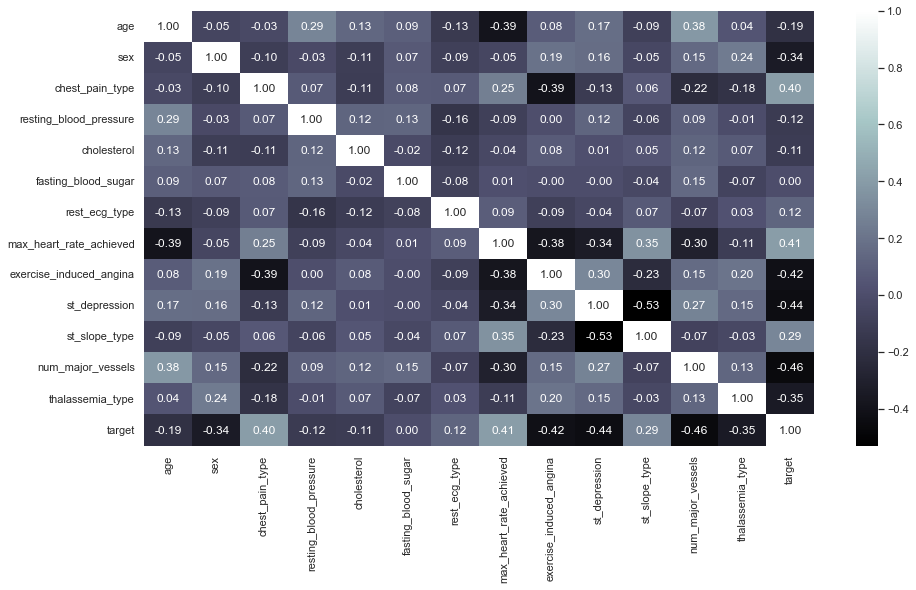

In [50]:
# A plot to view the correlation between the features of the dataframe new_ndf
plt.figure(figsize=(15,8))
sns.heatmap(new_ndf.corr(),annot=True,cmap="bone",fmt='.2f')

    #from the above correlation plot,the target variable is inveresely related to cholesterol but with low variance.

# g.	State what relationship exists between peak exercising and the occurrence of a heart attack

Text(0.5, 1.0, ' Peak exercising vs Occurrence of a heart attack')

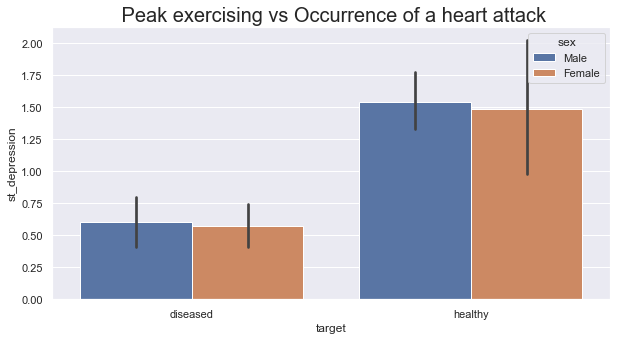

In [51]:
# View to check how the peaking excercise is related to heart attack w.r.t target variable
plt.figure(figsize=(10,5))
sns.barplot(data=new_df,x='target',y='st_depression',hue='sex')
plt.title(' Peak exercising vs Occurrence of a heart attack',{'size':20})

    # On comparision with non diseased patients, diseased patients are very less effective to peak excercising and also  observed that st_depression for diseased patients were observed to range b/w 0.0 to 0.65.
    # From the correlation plot,the correlation between st_depression and target very is highly correlated and it's value is -0.44 which implies peak excercising is inversely related to target.

# h.	Check if thalassemia is a major cause of CVD

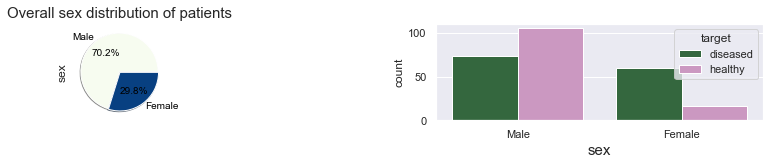

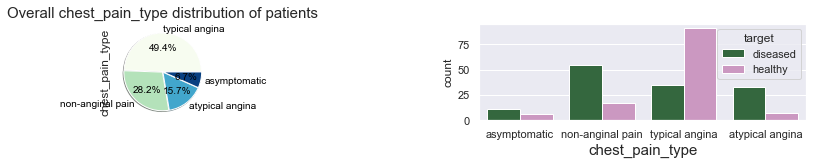

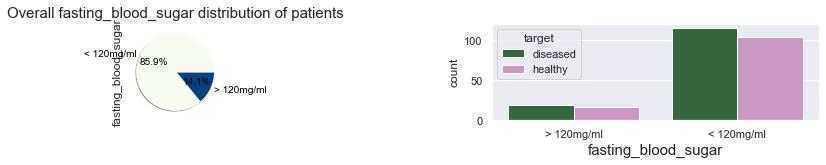

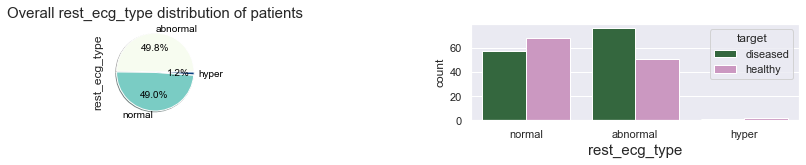

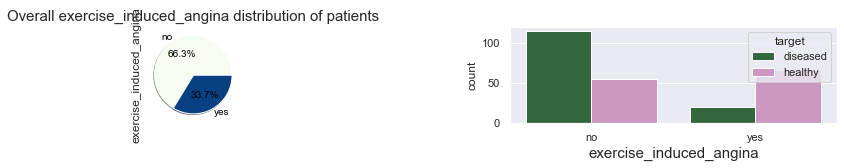

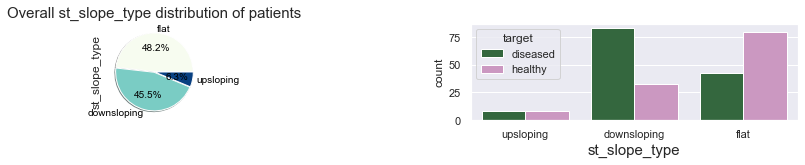

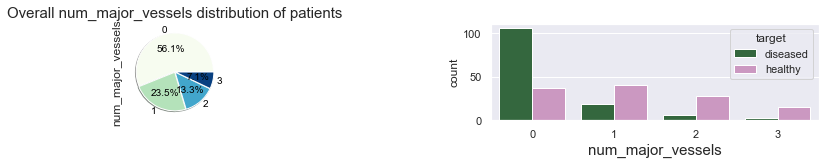

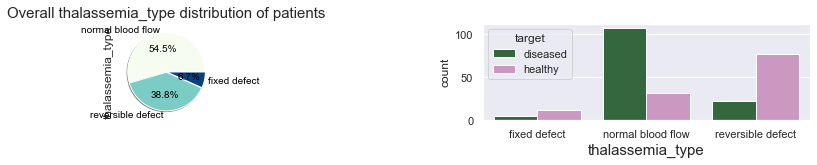

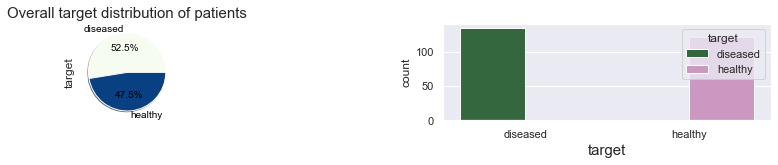

In [52]:
for column in ctg_df:
    ctg_plots(column)

    # From the above plots,we can say that thalassemia is not a major cause for CVD,it's the second major cause for CVD and the first one is fasting blood sugar.

## j.	Use a pair plot to understand the relationship between all the given variables

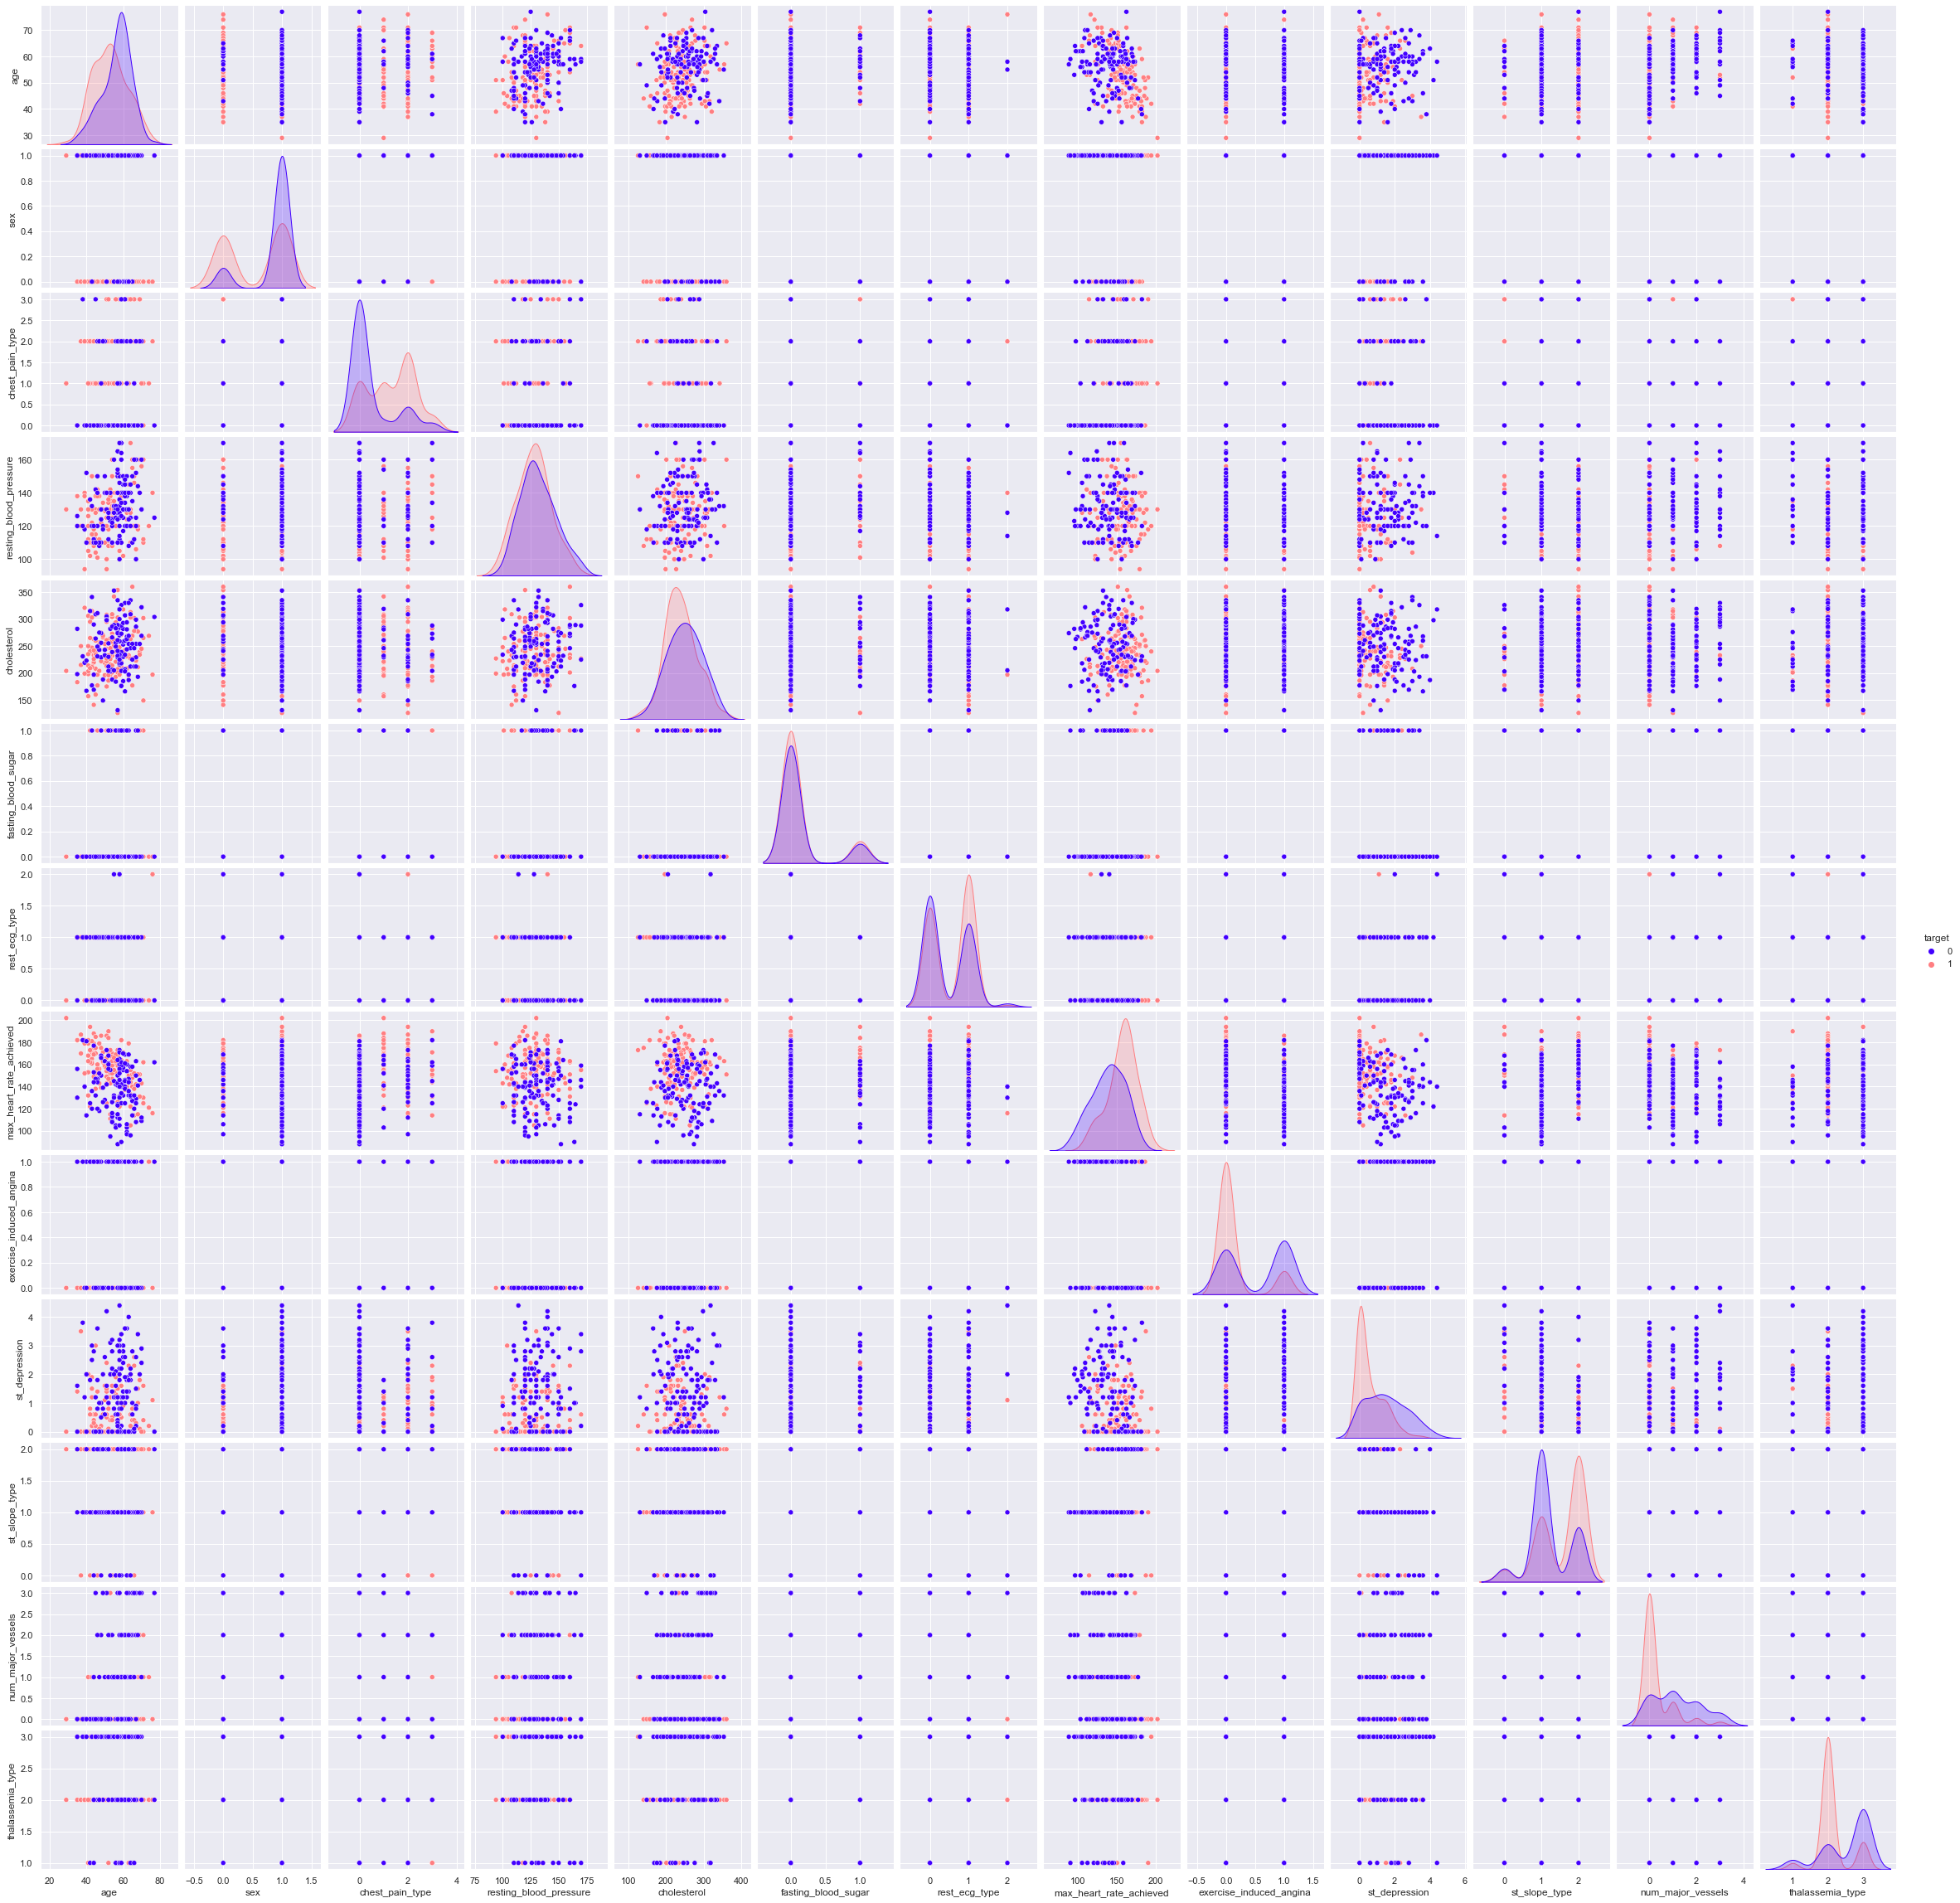

In [53]:
#To view how the features in the given dataset are related w.r.t pateints health condition
sns.pairplot(data=new_ndf,hue='target',palette='gnuplot2')

In [54]:
new_ndf.corr() 

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
age,1.000000,-0.052817,-0.032437,0.285803,0.133491,0.093057,-0.133033,-0.389100,0.084150,0.172874,-0.089862,0.383863,0.043353,-0.194985
sex,-0.052817,1.000000,-0.100702,-0.025869,-0.105245,0.067205,-0.087955,-0.048992,0.192798,0.164644,-0.045427,0.147246,0.237732,-0.344471
chest_pain_type,-0.032437,-0.100702,1.000000,0.068188,-0.106774,0.075466,0.069505,0.254116,-0.393063,-0.126513,0.056456,-0.222827,-0.179072,0.404957
resting_blood_pressure,0.285803,-0.025869,0.068188,1.000000,0.124527,0.127902,-0.164634,-0.089399,0.003885,0.124011,-0.059601,0.092835,-0.009717,-0.124876
cholesterol,0.133491,-0.105245,-0.106774,0.124527,1.000000,-0.016612,-0.117048,-0.036717,0.078749,0.013887,0.045406,0.122089,0.073528,-0.113938
fasting_blood_sugar,0.093057,0.067205,0.075466,0.127902,-0.016612,1.000000,-0.081392,0.012739,-0.003363,-0.003715,-0.039538,0.146536,-0.067939,0.001857
rest_ecg_type,-0.133033,-0.087955,0.069505,-0.164634,-0.117048,-0.081392,1.000000,0.086093,-0.092938,-0.044041,0.072695,-0.070821,0.028245,0.121880
max_heart_rate_achieved,-0.389100,-0.048992,0.254116,-0.089399,-0.036717,0.012739,0.086093,1.000000,-0.378585,-0.337380,0.354441,-0.300118,-0.108279,0.406721
exercise_induced_angina,0.084150,0.192798,-0.393063,0.003885,0.078749,-0.003363,-0.092938,-0.378585,1.000000,0.298571,-0.229995,0.154529,0.200702,-0.418473
st_depression,0.172874,0.164644,-0.126513,0.124011,0.013887,-0.003715,-0.044041,-0.337380,0.298571,1.000000,-0.529942,0.272599,0.148356,-0.435133


#  LOGISTIC REGRESSION 

## Building a baseline model using logistic regression algorithm

In [55]:
# importing required libraries to bild a model
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [56]:
ctg_df.head(2) #checking the data of categorical dataframe

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg_type,exercise_induced_angina,st_slope_type,num_major_vessels,thalassemia_type,target
0,Male,asymptomatic,> 120mg/ml,normal,no,upsloping,0,fixed defect,diseased
1,Male,non-anginal pain,< 120mg/ml,abnormal,no,upsloping,0,normal blood flow,diseased


In [57]:
ctg_df.drop(columns=['target'],inplace=True)
ctg_df.shape

(255, 8)

In [58]:
ctg_dummies_df=pd.get_dummies(new_df.iloc[:,0:-1],columns=ctg_df.columns)
ctg_dummies_df.head(2)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_Female,sex_Male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,thalassemia_type_fixed defect,thalassemia_type_normal blood flow,thalassemia_type_reversible defect
0,63,145,233,150,2.3,0,1,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [59]:
sc=StandardScaler()
X=sc.fit_transform(ctg_dummies_df)
X[0]

array([ 0.95441987,  0.98039704, -0.26463274,  0.0876077 ,  1.17066432,
       -0.65159881,  0.65159881,  3.74165739, -0.43133109, -0.62725005,
       -0.98830369, -2.46644143,  2.46644143, -0.99608609, -0.10910895,
        1.0198039 ,  0.71335527, -0.71335527, -0.91352743, -0.9653073 ,
        3.86490621,  0.88499536, -0.5547002 , -0.39223227, -0.27558913,
        3.74165739, -1.09465787, -0.79662751])

In [60]:
scaled_X=pd.DataFrame(X,columns=ctg_dummies_df.columns)

In [61]:
scaled_X.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_Female,sex_Male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,thalassemia_type_fixed defect,thalassemia_type_normal blood flow,thalassemia_type_reversible defect
0,0.954420,0.980397,-0.264633,0.087608,1.170664,-0.651599,0.651599,3.741657,-0.431331,-0.627250,...,-0.913527,-0.965307,3.864906,0.884995,-0.5547,-0.392232,-0.275589,3.741657,-1.094658,-0.796628
1,-1.995605,0.020331,0.118784,1.750744,2.281090,-0.651599,0.651599,-0.267261,-0.431331,1.594261,...,-0.913527,-0.965307,3.864906,0.884995,-0.5547,-0.392232,-0.275589,-0.267261,0.913527,-0.796628
2,0.273645,-0.619713,2.464392,0.671953,-0.402439,1.534687,-1.534687,-0.267261,-0.431331,-0.627250,...,1.094658,-0.965307,-0.258738,0.884995,-0.5547,-0.392232,-0.275589,-0.267261,0.913527,-0.796628
3,0.160182,0.660375,1.111157,0.222457,0.245310,1.534687,-1.534687,-0.267261,2.318405,-0.627250,...,-0.913527,1.035940,-0.258738,0.884995,-0.5547,-0.392232,-0.275589,-0.267261,0.913527,-0.796628
4,-1.201368,-0.619713,0.411985,1.121449,-0.957651,-0.651599,0.651599,-0.267261,2.318405,-0.627250,...,1.094658,-0.965307,-0.258738,0.884995,-0.5547,-0.392232,-0.275589,-0.267261,-1.094658,1.255292


In [62]:
Y=new_df.iloc[:,-1]
Y.head()

0    diseased
1    diseased
4    diseased
6    diseased
7    diseased
Name: target, dtype: object

In [63]:
X_train,X_test,Y_train,Y_test=split(scaled_X,Y,random_state=0,test_size=0.25)

lg_model=LogisticRegression()
lg_model.fit(X_train,Y_train)
Y_predict=lg_model.predict(X_test)

Df=pd.DataFrame({'Actual_y':Y_test,'Predicted_y':Y_predict})
Df.head(5)

,Actual_y,Predicted_y
189,healthy,healthy
103,diseased,diseased
201,healthy,healthy
124,diseased,diseased
180,healthy,healthy


In [64]:
print(confusion_matrix(Y_test,Y_predict))
print('======================')
print(accuracy_score(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[29  1]
 [ 7 27]]
0.875
              precision    recall  f1-score   support

    diseased       0.81      0.97      0.88        30
     healthy       0.96      0.79      0.87        34

    accuracy                           0.88        64
   macro avg       0.88      0.88      0.87        64
weighted avg       0.89      0.88      0.87        64



## Building a baseline model using RandomForest Classifier algorithm

In [65]:
from sklearn.ensemble import RandomForestClassifier
Rfc=RandomForestClassifier(n_estimators=20,random_state=0)
Rfc.fit(X_train,Y_train)
Y_predict=Rfc.predict(X_test)

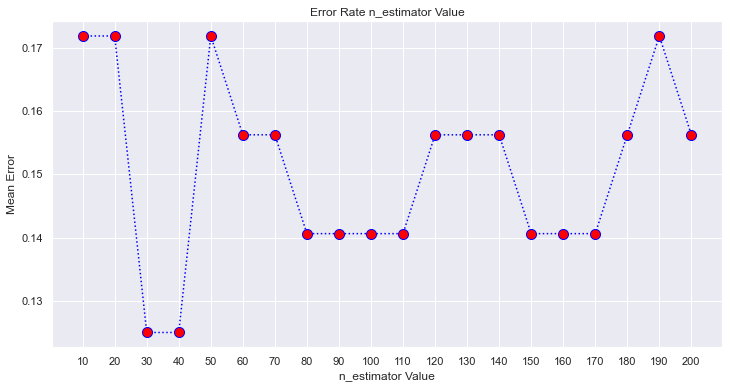

In [66]:
error=[]
for i in range(10, 201, 10):  
    classifier = RandomForestClassifier(n_estimators = i,random_state=100)
    classifier.fit(X_train, Y_train)
    pred_i = classifier.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(10, 201, 10),error,color='blue',linestyle=':',marker='o',markerfacecolor='red',markersize=10)
plt.xticks(np.arange(10, 201, step=10))
plt.title('Error Rate n_estimator Value')  
plt.xlabel('n_estimator Value')  
plt.ylabel('Mean Error'); 

In [67]:
print(confusion_matrix(Y_test,Y_predict))   
print(classification_report(Y_test,Y_predict))  
print(accuracy_score(Y_test,Y_predict))

[[27  3]
 [10 24]]
              precision    recall  f1-score   support

    diseased       0.73      0.90      0.81        30
     healthy       0.89      0.71      0.79        34

    accuracy                           0.80        64
   macro avg       0.81      0.80      0.80        64
weighted avg       0.81      0.80      0.80        64

0.796875


In [68]:
Rfc=RandomForestClassifier(n_estimators=30,random_state=0)
Rfc.fit(X_train,Y_train)
Y_predict=Rfc.predict(X_test)

In [69]:
print(confusion_matrix(Y_test,Y_predict))   
print(classification_report(Y_test,Y_predict))  
print(accuracy_score(Y_test,Y_predict))

[[29  1]
 [10 24]]
              precision    recall  f1-score   support

    diseased       0.74      0.97      0.84        30
     healthy       0.96      0.71      0.81        34

    accuracy                           0.83        64
   macro avg       0.85      0.84      0.83        64
weighted avg       0.86      0.83      0.83        64

0.828125


# Building a model with features after feature selection.

##  Feature Selection through CHISQUARE TEST

In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant as ac
new_ndf_constant=ac(df)
new_ndf_constant.head(3)

,const,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,1.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [71]:
from scipy import stats as st

In [72]:
st.chisqprob=lambda chisq,new_ndf:st.chi2.smf(chisq,new_ndf)
cols=new_ndf_constant.columns[:-1]
mdl=sm.Logit(new_ndf_constant.target,new_ndf_constant[cols])
result=mdl.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.327823
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           13
Date:                Thu, 29 Sep 2022   Pseudo R-squ.:                  0.5248
Time:                        09:35:32   Log-Likelihood:                -97.691
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                 7.672e-39
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.3034      2.713      1.218      0.223      -2.013       8.620
age                         0.0112      0.025      0.452      0.651      -0.037       0.060
sex                        -1.8339      0.488     -3.755      0.000      -2.791      -0.877
chest_pain_type             0.8168      0.192      4.265      0.000       0.441       1.192
resting_blood_pressure     -0.0246      0.011     -2.262      0.024      -0.046      -0.003
cholesterol                -0.0045      0.004     -1.119      0.263      -0.012       0.003
fasting_blood_sugar         0.4455      0.566      0.788      0.431      -0.663       1.554
rest_ecg_type               0.3429      0.363      0.944      0.345      -0.369       1.055
max_heart_rate_achieved     0.0243      0.011      2.231      0.026       0.003       0.046
exercise_induced_angina    -0.9367      0.427     -2.196      0.028      -1.773      -0.101
st_depression              -0.4035      0.224     -1.801      0.072      -0.843       0.036
st_slope_type               0.7930      0.364      2.178      0.029       0.080       1.506
num_major_vessels          -1.2982      0.272     -4.779      0.000      -1.831      -0.766
thalassemia_type           -1.0598      0.315     -3.363      0.001      -1.678      -0.442
===========================================================================================
"""

In [73]:
def feature_sg(new_ndf,tgt,clmn):
    while len(clmn)>0:
        mdl=sm.Logit(tgt,new_ndf[clmn])
        result=mdl.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
        else:
            clmn=clmn.drop(largest_pvalue.index)
result=feature_sg(new_ndf_constant,new_ndf_constant.target,cols)

In [74]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            7
Date:                Thu, 29 Sep 2022   Pseudo R-squ.:                  0.5035
Time:                        09:35:33   Log-Likelihood:                -102.07
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                 3.690e-41
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
sex                        -1.5373      0.430     -3.576      0.000      -2.380      -0.695
chest_pain_type             0.7807      0.183      4.277      0.000       0.423       1.138
max_heart_rate_achieved     0.0221      0.006      3.962      0.000       0.011       0.033
exercise_induced_angina    -0.9121      0.395     -2.306      0.021      -1.687      -0.137
st_depression              -0.4530      0.203     -2.233      0.026      -0.850      -0.055
st_slope_type               0.7444      0.342      2.175      0.030       0.074       1.415
num_major_vessels          -1.2035      0.244     -4.926      0.000      -1.682      -0.725
thalassemia_type           -1.0463      0.285     -3.666      0.000      -1.606      -0.487
===========================================================================================
"""

In [75]:
final_df=new_df[['sex','chest_pain_type','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope_type','num_major_vessels','thalassemia_type','target']]

In [76]:
final_df.head(2)

,sex,chest_pain_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,Male,asymptomatic,150,no,2.3,upsloping,0,fixed defect,diseased
1,Male,non-anginal pain,187,no,3.5,upsloping,0,normal blood flow,diseased


In [77]:
ctg_df.drop(columns=['fasting_blood_sugar','rest_ecg_type'],inplace=True) #dataframe with selected categorical variables

In [78]:
ctg_df.head(2)

,sex,chest_pain_type,exercise_induced_angina,st_slope_type,num_major_vessels,thalassemia_type
0,Male,asymptomatic,no,upsloping,0,fixed defect
1,Male,non-anginal pain,no,upsloping,0,normal blood flow


In [79]:
dummies_df=pd.get_dummies(final_df.iloc[:,0:-1],columns=ctg_df.columns) #Creating the dummies dataframe of categorical variables

In [80]:
dummies_df.head() # Viewing the first 5 rows of dummy dataframe

,max_heart_rate_achieved,st_depression,sex_Female,sex_Male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,thalassemia_type_fixed defect,thalassemia_type_normal blood flow,thalassemia_type_reversible defect
0,150,2.3,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
1,187,3.5,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,163,0.6,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0
6,153,1.3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
7,173,0.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1


In [81]:
x=sc.fit_transform(dummies_df) #Scaling the data of dummies dataframe to normalize the data and creating a seperate df only for features
y=final_df.iloc[:,-1] # A dataframe with target variables.

In [82]:
# Spliting the features and target varaibles 
x_train,x_test,y_train,y_test=split(x,y,random_state=0,test_size=0.3)
#Viewing the shape of splitted data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(178, 20)
(178,)
(77, 20)
(77,)


In [83]:
# Building logistic regression model with selected features
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

print(confusion_matrix(y_test,y_pred))   
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test,y_pred))

[[33  4]
 [ 7 33]]
              precision    recall  f1-score   support

    diseased       0.82      0.89      0.86        37
     healthy       0.89      0.82      0.86        40

    accuracy                           0.86        77
   macro avg       0.86      0.86      0.86        77
weighted avg       0.86      0.86      0.86        77

0.8571428571428571


## With baseline LogisticRegression model the accuracy is 82.8125 %  but  with the feature selected  LogisticRegression model not only accuracy but also f1 score is increased to 85.71%

In [84]:
#Building the Random forest classifier with selected features
RFC=RandomForestClassifier(n_estimators=20,random_state=0)
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)

print('confusion_matrix:',confusion_matrix(y_test,y_pred))   
print('classification_report:',classification_report(y_test,y_pred))  
print('accuracy_score:',accuracy_score(y_test,y_pred))

confusion_matrix: [[32  5]
 [ 8 32]]
classification_report:               precision    recall  f1-score   support

    diseased       0.80      0.86      0.83        37
     healthy       0.86      0.80      0.83        40

    accuracy                           0.83        77
   macro avg       0.83      0.83      0.83        77
weighted avg       0.83      0.83      0.83        77

accuracy_score: 0.8311688311688312


Text(0, 0.5, 'Mean_Error')

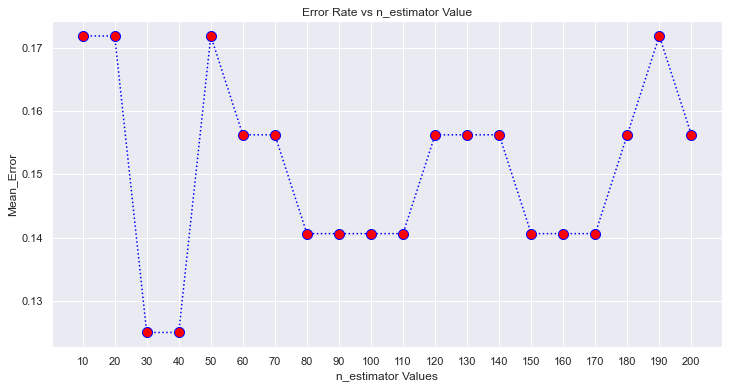

In [85]:
error=[]
for i in range(10, 201, 10):  
    classifier = RandomForestClassifier(n_estimators = i,random_state=100)
    classifier.fit(X_train, Y_train)
    pred_i = classifier.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(10, 201, 10),error,color='blue',linestyle=':',marker='o',markerfacecolor='red',markersize=10)
plt.xticks(np.arange(10, 201, step=10))
plt.title('Error Rate vs n_estimator Value')  
plt.xlabel('n_estimator Values')  
plt.ylabel('Mean_Error')

In [86]:
# Checking for best accuracy of the building model by fixing the estimator values which give low error
RFC=RandomForestClassifier(n_estimators=35,random_state=0)
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)

print(confusion_matrix(y_test,y_pred))   
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test,y_pred))

[[32  5]
 [ 8 32]]
              precision    recall  f1-score   support

    diseased       0.80      0.86      0.83        37
     healthy       0.86      0.80      0.83        40

    accuracy                           0.83        77
   macro avg       0.83      0.83      0.83        77
weighted avg       0.83      0.83      0.83        77

0.8311688311688312


## With baseline RandomForestClassifier model the accuracy is 82.8125% but with feature selection  the accuracy has been improved to 83.16%.Beacuse of the feature selection the f1-score of the model is also  increased